<a href="https://colab.research.google.com/github/Saeed-Lababidi/CS313/blob/main/CS313_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/online_shoppers_intention.csv')
data.head(10)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   
7               1                      0.0              0   
8               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
6                     0.0               1                 0.000000   
7                     0.0               0                 0.000000   
8                     0.0               2                37.000000   
9                     0.0               3               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000         0.0         0.0   Feb                 1   
1     0.000000   0.100000         0.0         0.0   Feb                 2   
2     0.200000   0.200000         0.0         0.0   Feb                 4   
3     0.050000   0.140000         0.0         0.0   Feb                 3   
4     0.020000   0.050000         0.0         0.0   Feb                 3   
5     0.015789   0.024561         0.0         0.0   Feb                 2   
6     0.200000   0.200000         0.0         0.4   Feb                 2   
7     0.200000   0.200000         0.0         0.0   Feb                 1   
8     0.000000   0.100000         0.0         0.8   Feb                 2   
9     0.000000   0.022222         0.0         0.4   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False  
5        2       1            3  Returning_Visitor    False    False  
6        4       3            3  Returning_Visitor    False    False  
7        2       1            5  Returning_Visitor     True    False  
8        2       2            3  Returning_Visitor    False    False  
9        4       1            2  Returning_Visitor    False    False

In [3]:
# Check for missing values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

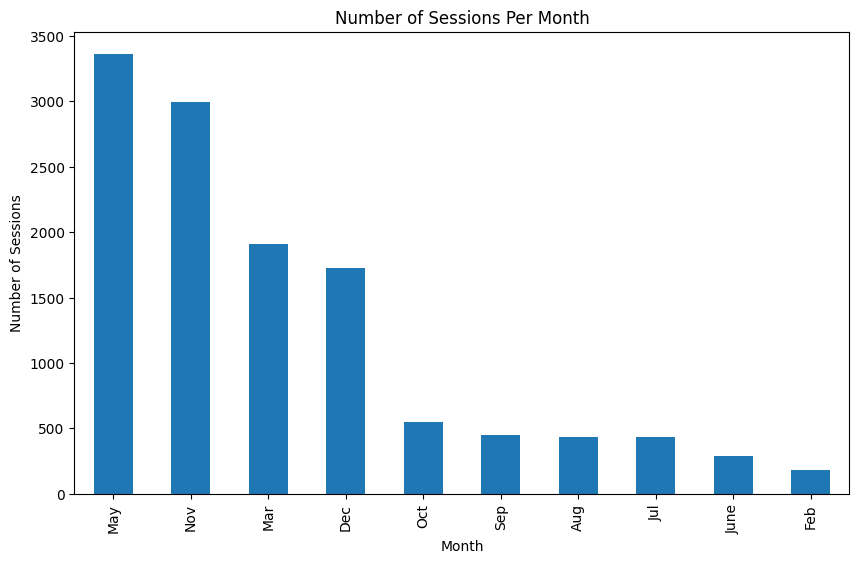

In [5]:
# Count the occurrences of each unique value in 'Month'
month_counts = data['Month'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar')
plt.title('Number of Sessions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.show()


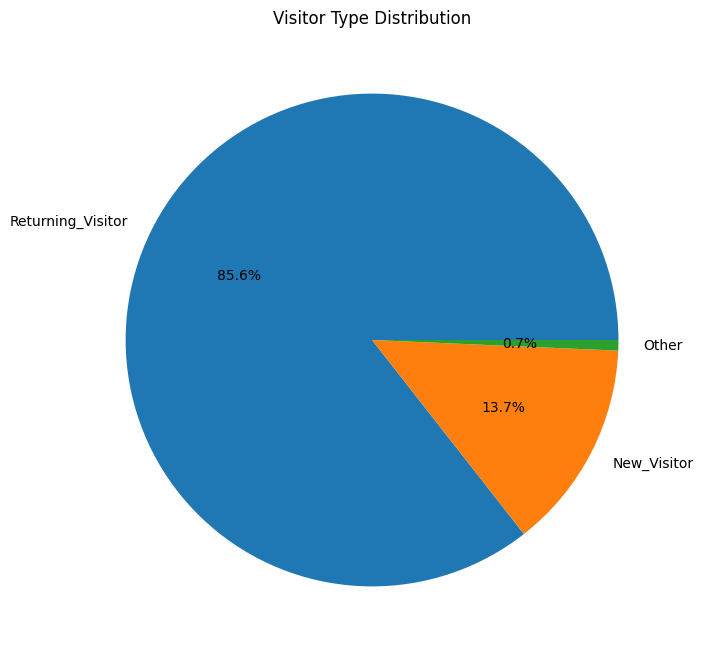

In [6]:
# Count the occurrences of each unique value in 'VisitorType'
visitor_type_counts = data['VisitorType'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
visitor_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Visitor Type Distribution')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()


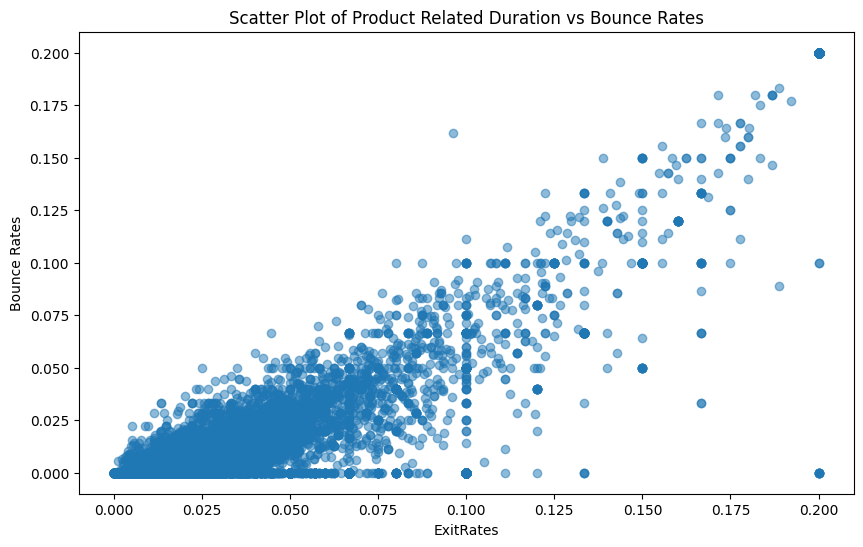

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['ExitRates'], data['BounceRates'], alpha=0.5)
plt.title('Scatter Plot of Product Related Duration vs Bounce Rates')
plt.xlabel('ExitRates')
plt.ylabel('Bounce Rates')
plt.show()


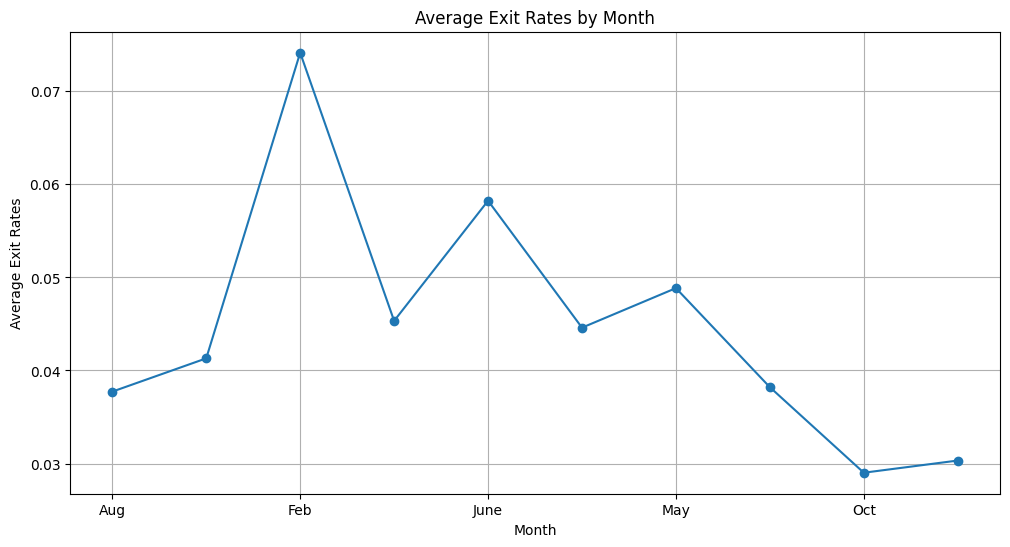

In [9]:
# Assuming months are sorted or you sort them as needed
sorted_data = data.sort_values('Month')

# Average ExitRates per month
average_exit_rates = sorted_data.groupby('Month')['ExitRates'].mean()

plt.figure(figsize=(12, 6))
average_exit_rates.plot(kind='line', marker='o')
plt.title('Average Exit Rates by Month')
plt.xlabel('Month')
plt.ylabel('Average Exit Rates')
plt.grid(True)
plt.show()


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<ipython-input-23-29b9d99fa526>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Administrative_Duration', data=data, palette='coolwarm')
<ipython-input-23-29b9d99fa526>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Informational_Duration', data=data, palette='coolwarm')
<ipython-input-23-29b9d99fa526>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='ProductRelated_Duration', data=data, palette='coolwarm')


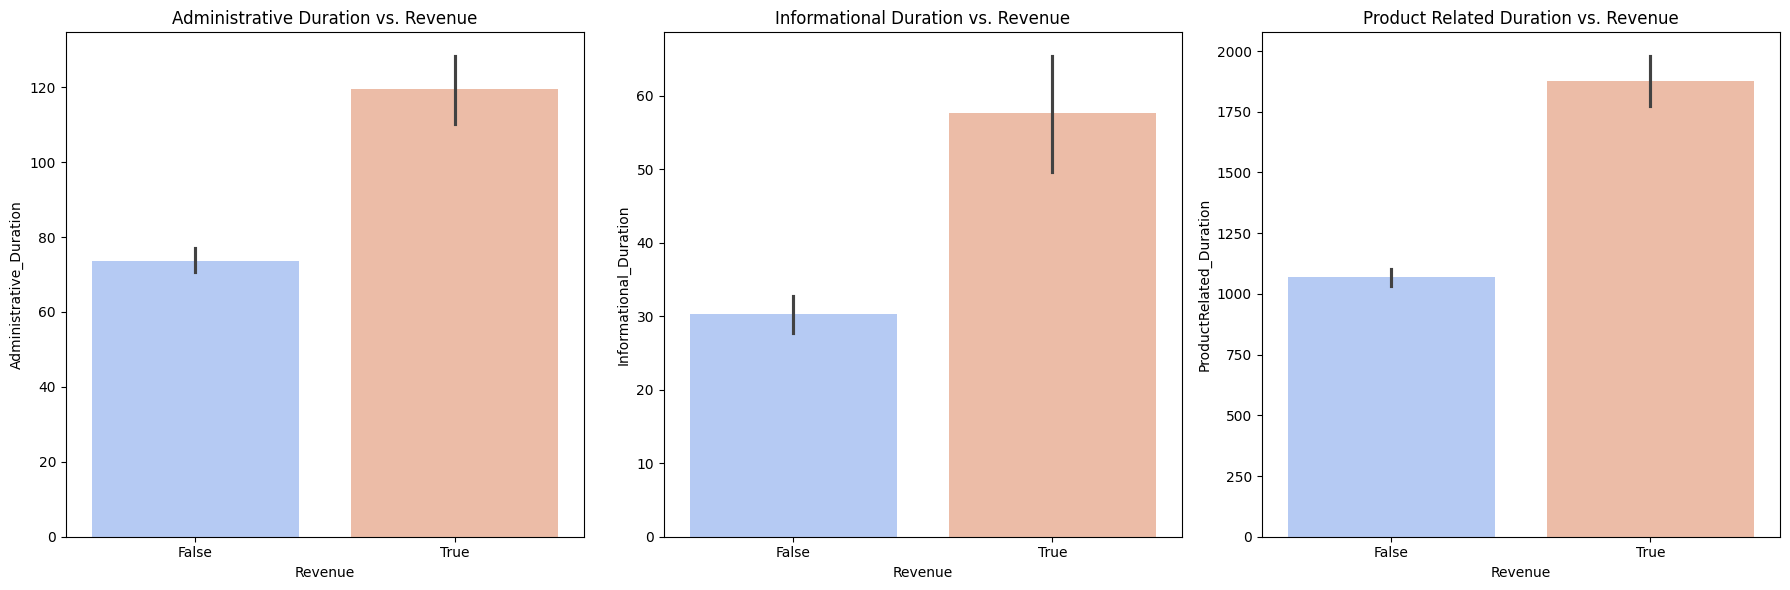

In [23]:

plt.figure(figsize=(18, 6))  # Width, Height in inches

# Bar plot for Administrative Duration
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.barplot(x='Revenue', y='Administrative_Duration', data=data, palette='coolwarm')
plt.title('Administrative Duration vs. Revenue')

# Bar plot for Informational Duration
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.barplot(x='Revenue', y='Informational_Duration', data=data, palette='coolwarm')
plt.title('Informational Duration vs. Revenue')

# Bar plot for Product Related Duration
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.barplot(x='Revenue', y='ProductRelated_Duration', data=data, palette='coolwarm')
plt.title('Product Related Duration vs. Revenue')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()  # Display the plots



In [3]:
from sklearn.preprocessing import LabelEncoder

categorical_and_bool_cols = data.select_dtypes(include=['object', 'bool']).columns
for col in categorical_and_bool_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Display the first few rows to verify changes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [25]:
data.head(10)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   
7               1                      0.0              0   
8               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
6                     0.0               1                 0.000000   
7                     0.0               0                 0.000000   
8                     0.0               2                37.000000   
9                     0.0               3               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     0.200000   0.200000         0.0         0.0      2                 1   
1     0.000000   0.100000         0.0         0.0      2                 2   
2     0.200000   0.200000         0.0         0.0      2                 4   
3     0.050000   0.140000         0.0         0.0      2                 3   
4     0.020000   0.050000         0.0         0.0      2                 3   
5     0.015789   0.024561         0.0         0.0      2                 2   
6     0.200000   0.200000         0.0         0.4      2                 2   
7     0.200000   0.200000         0.0         0.0      2                 1   
8     0.000000   0.100000         0.0         0.8      2                 2   
9     0.000000   0.022222         0.0         0.4      2                 2   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0        0  
1        2       1            2            2        0        0  
2        1       9            3            2        0        0  
3        2       2            4            2        0        0  
4        3       1            4            2        1        0  
5        2       1            3            2        0        0  
6        4       3            3            2        0        0  
7        2       1            5            2        1        0  
8        2       2            3            2        0        0  
9        4       1            2            2        0        0

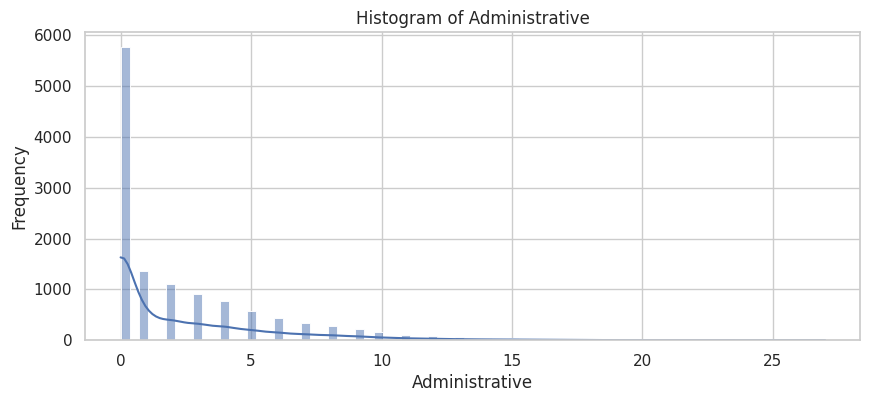

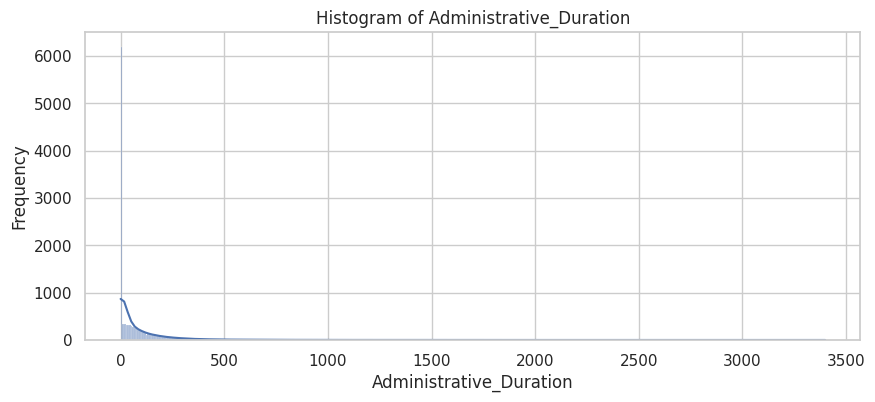

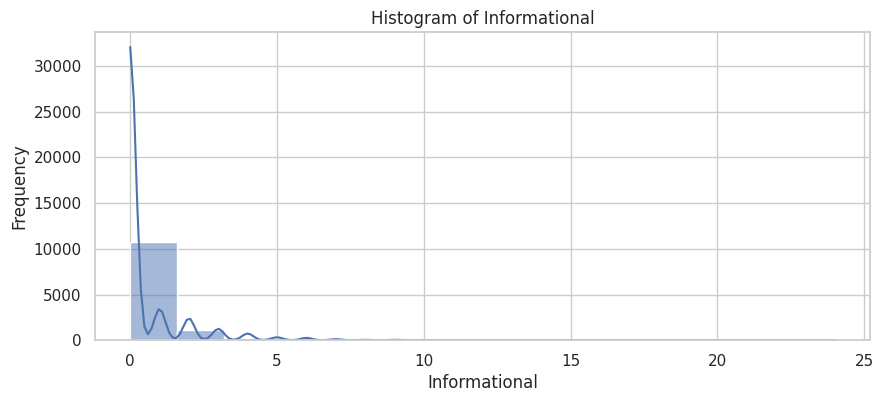

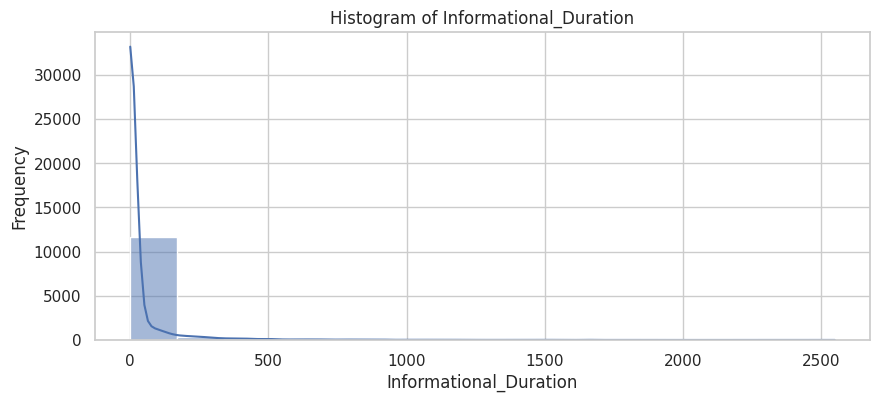

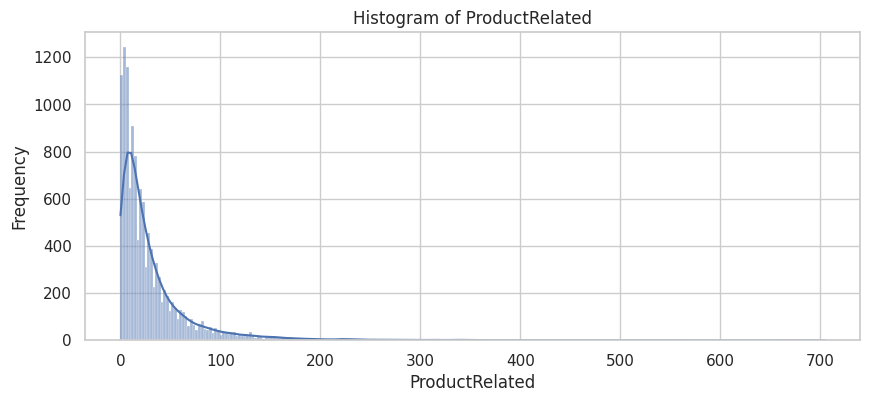

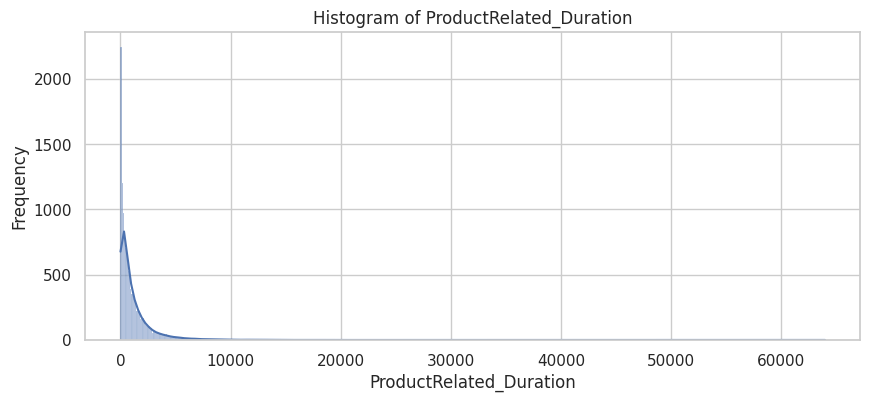

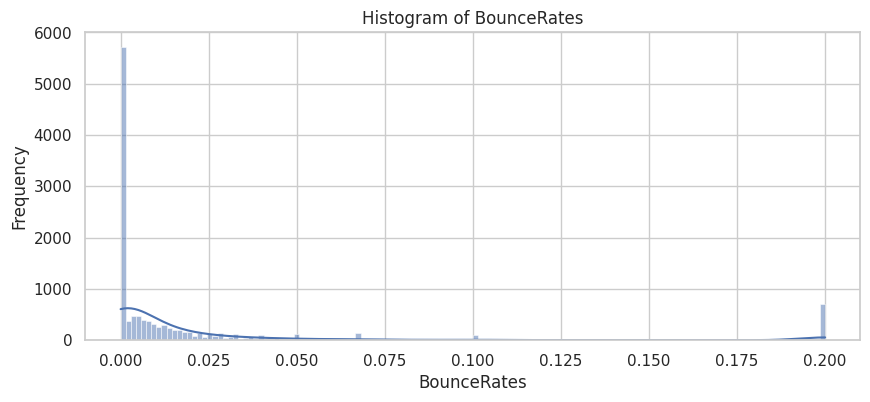

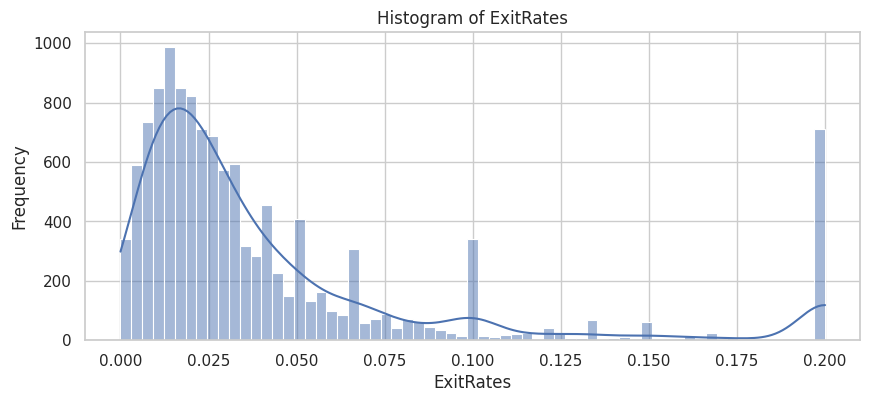

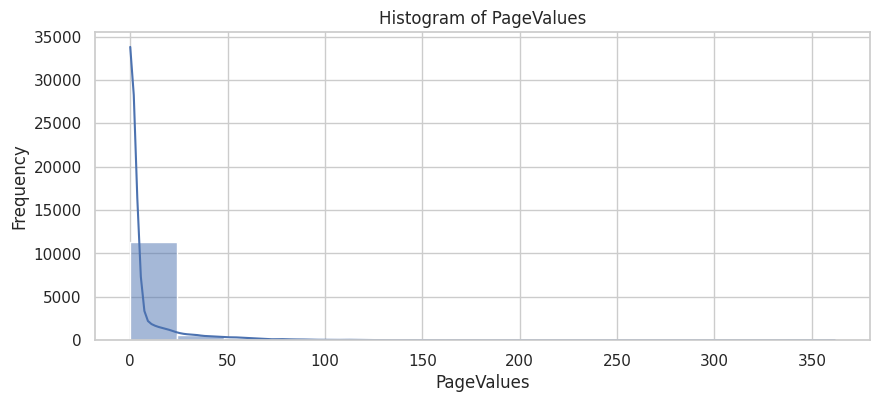

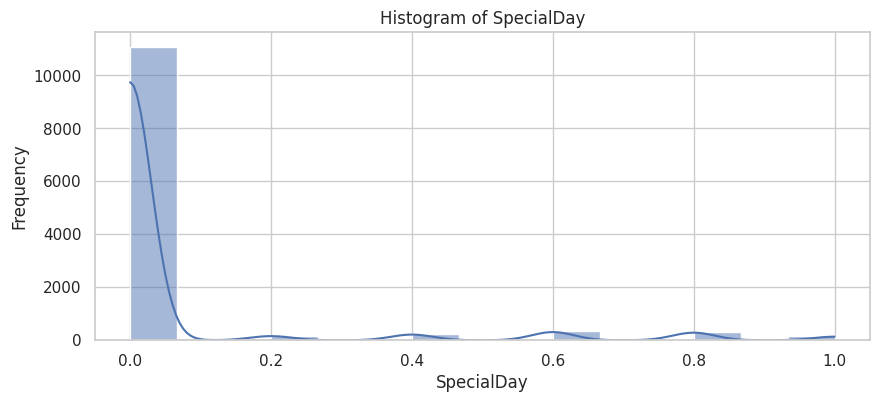

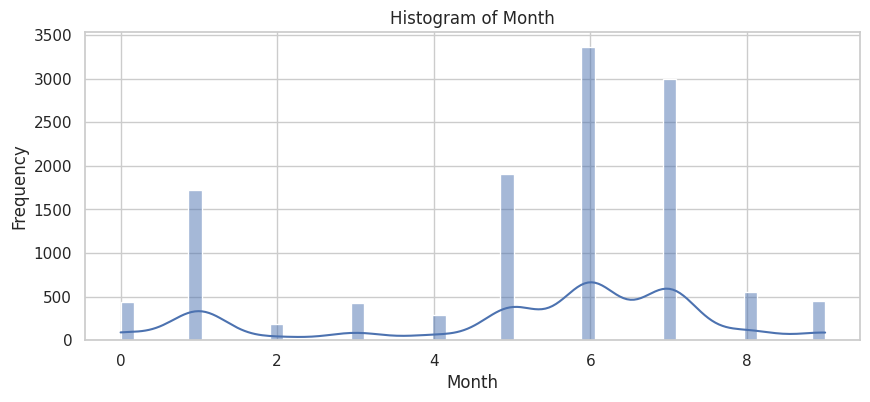

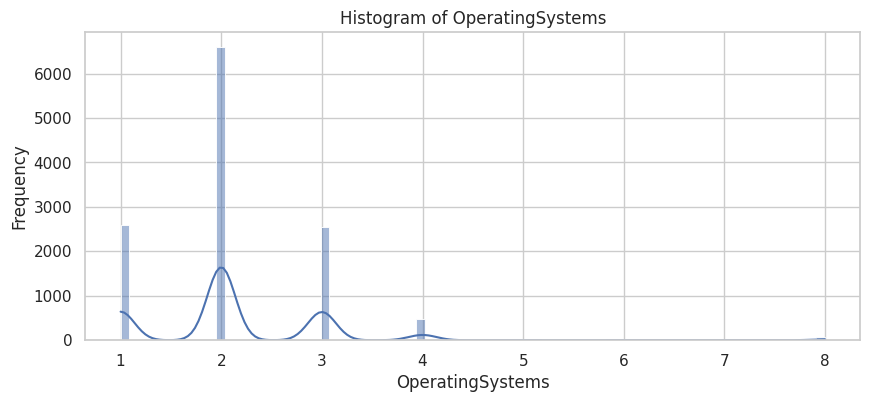

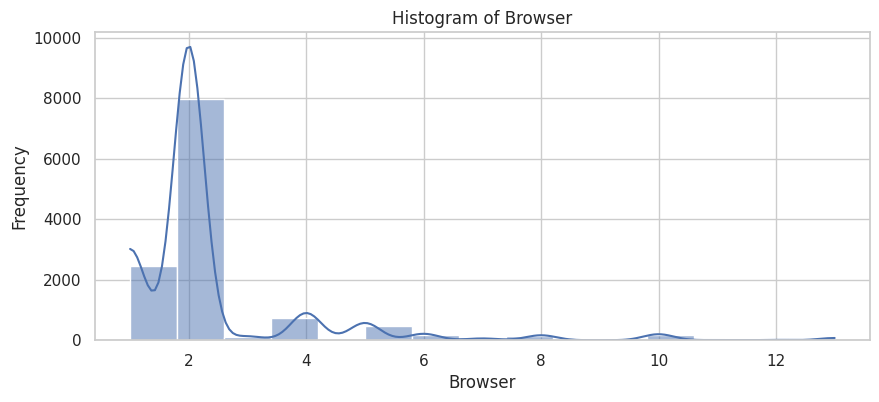

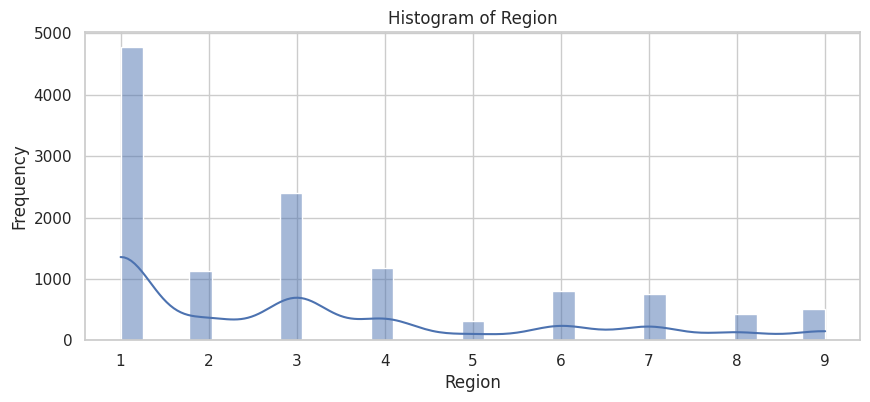

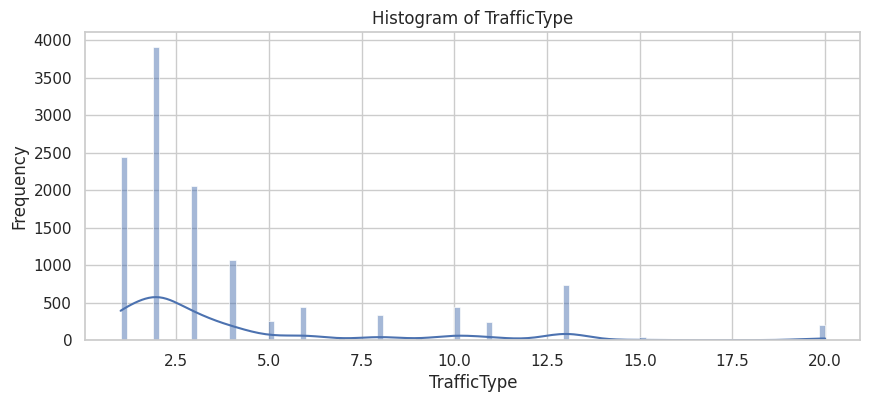

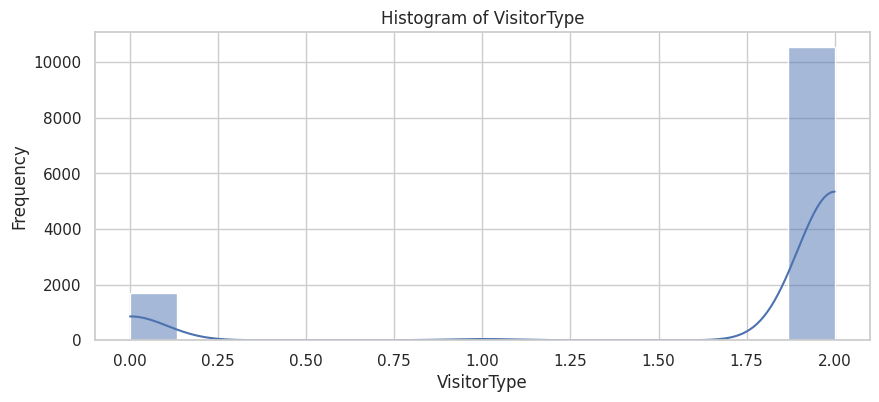

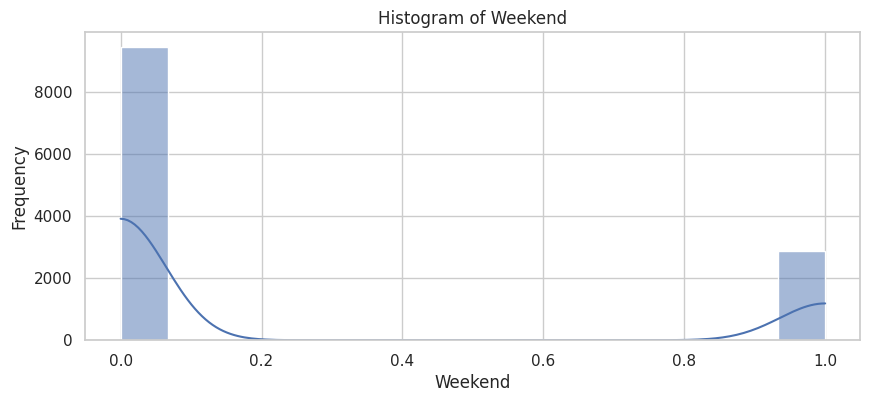

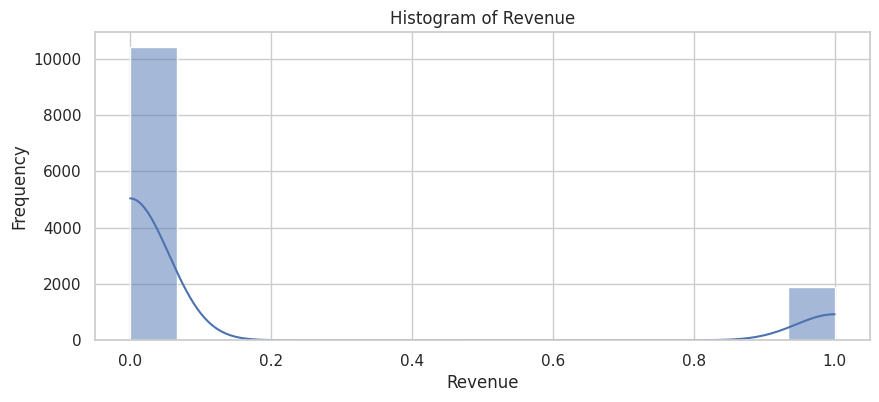

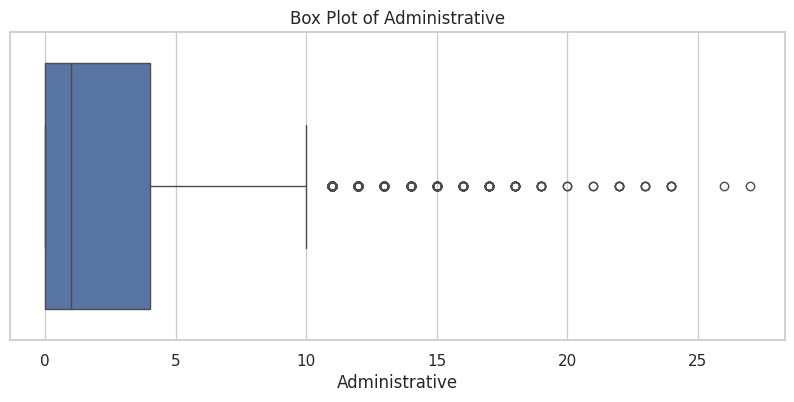

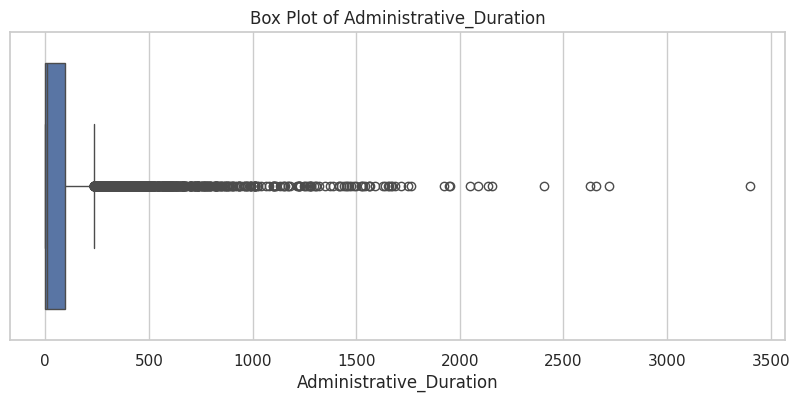

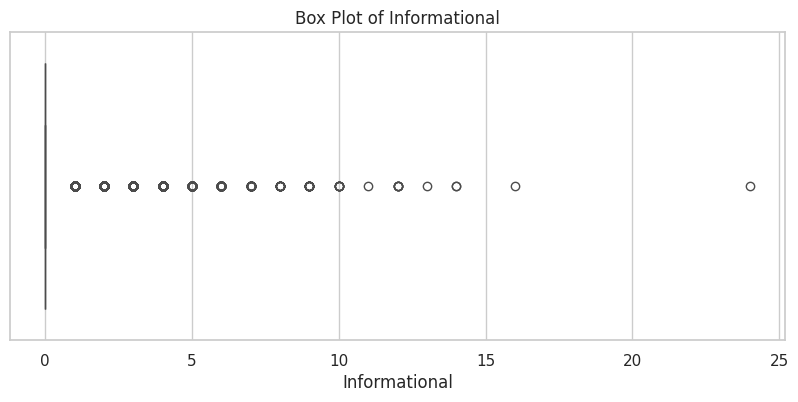

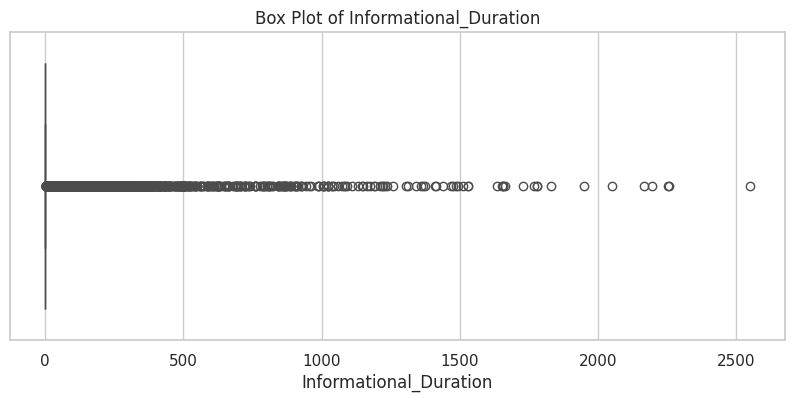

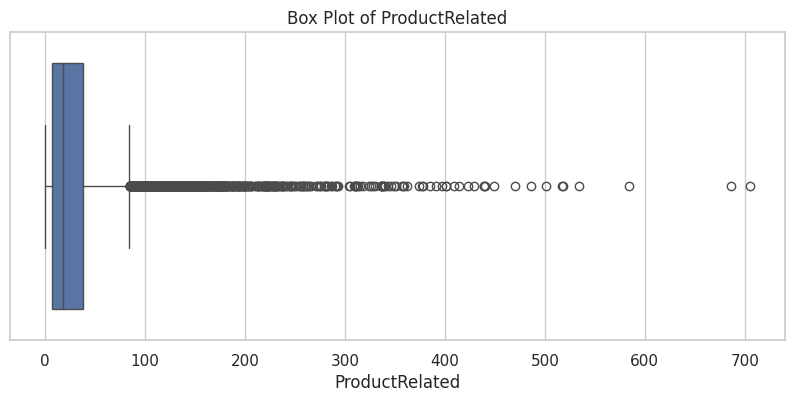

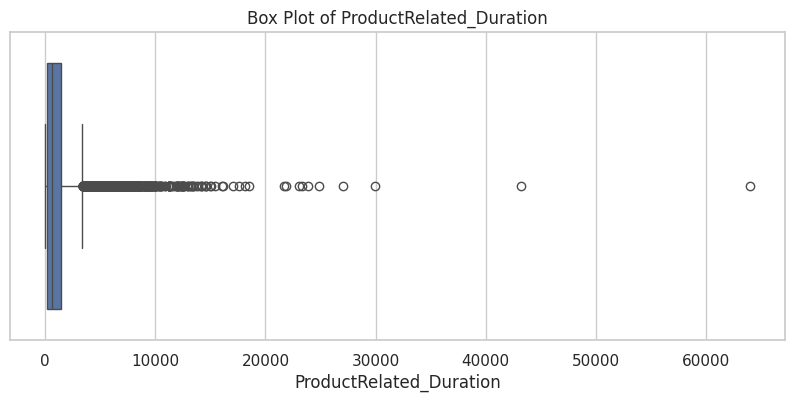

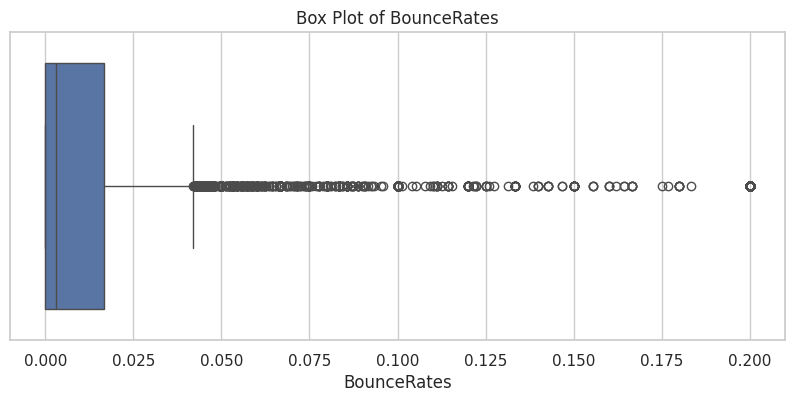

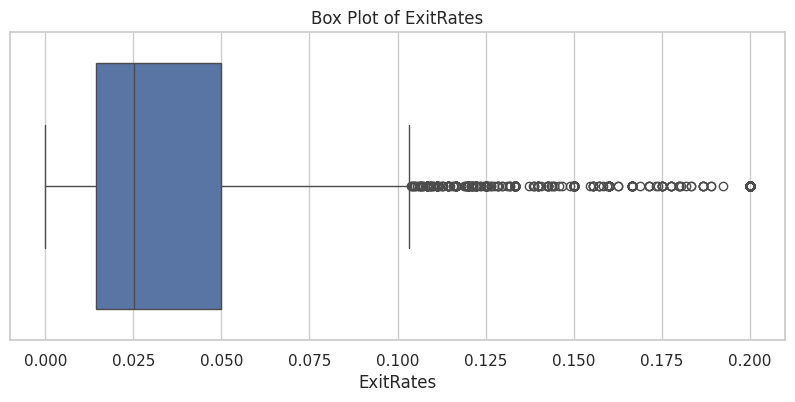

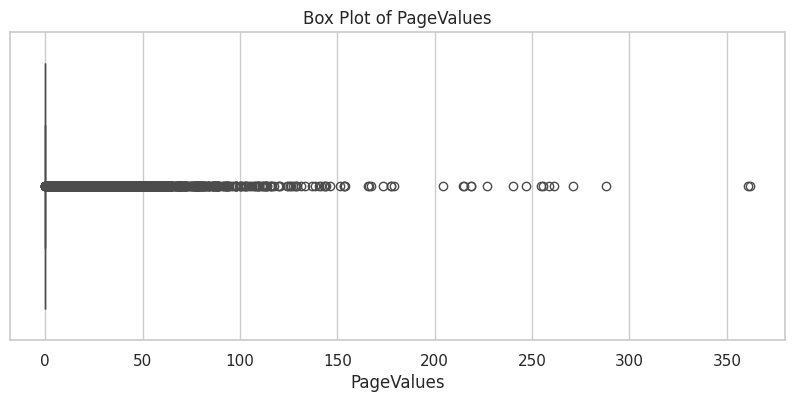

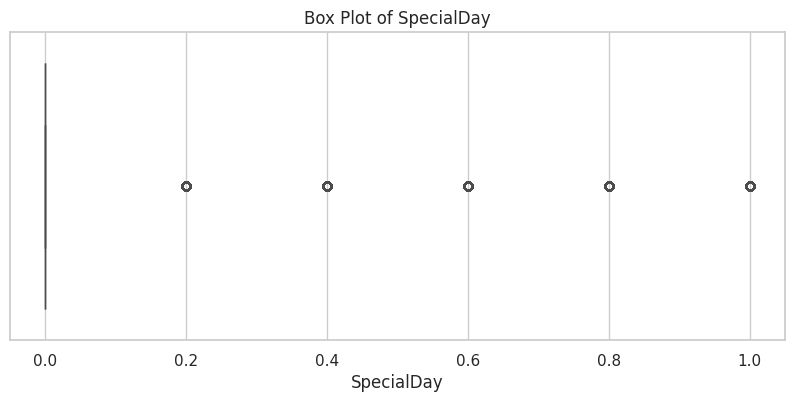

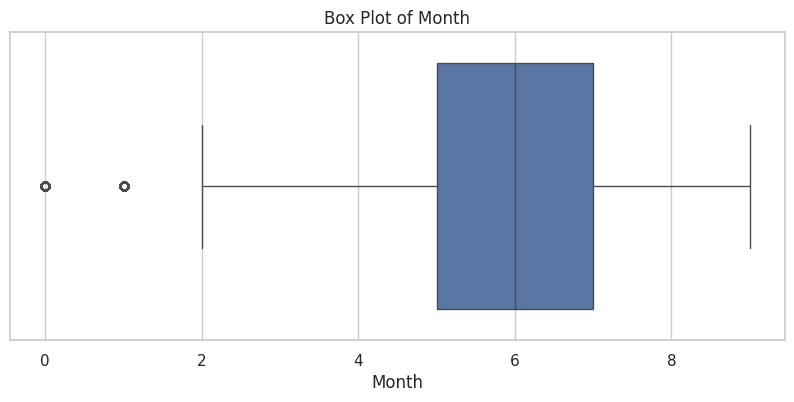

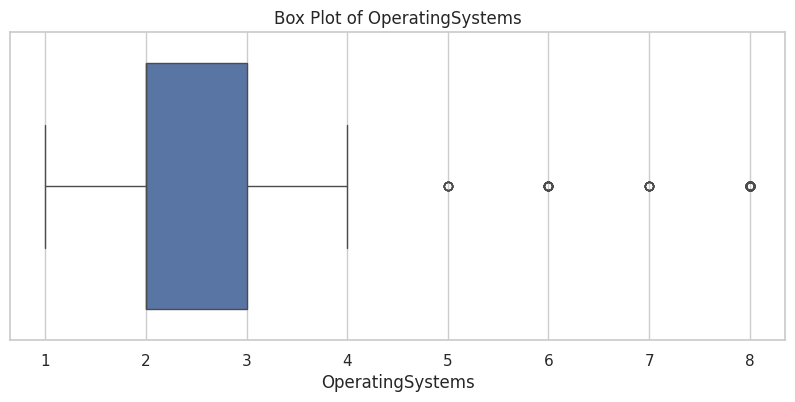

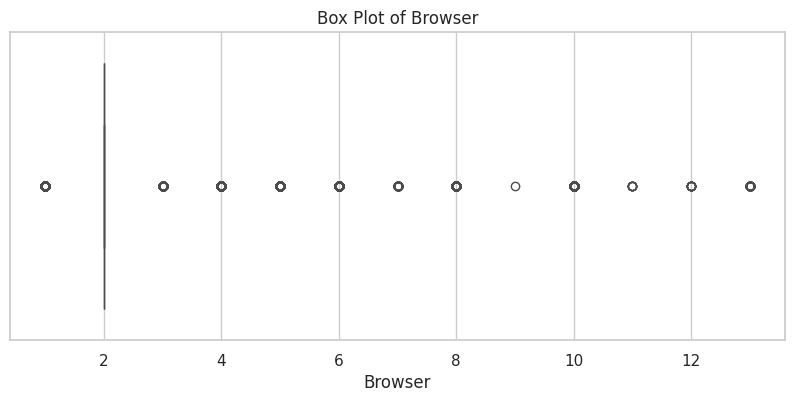

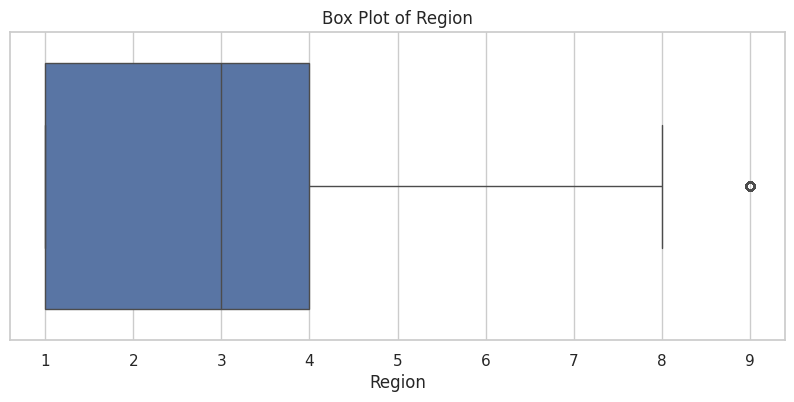

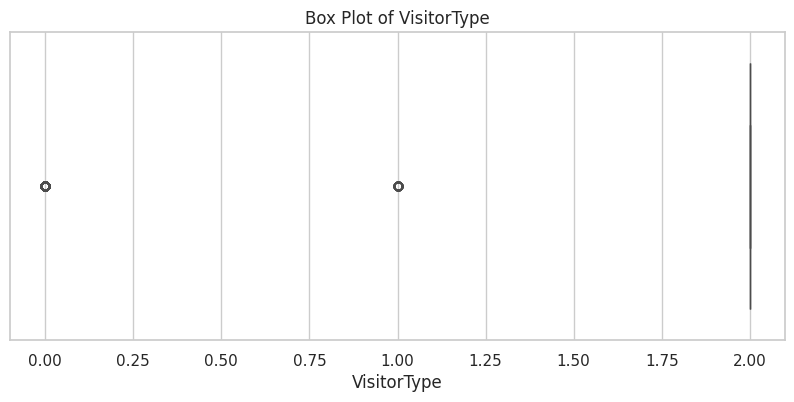

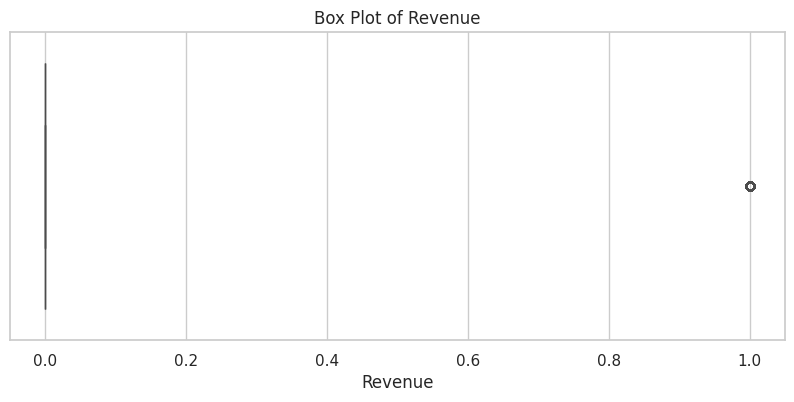

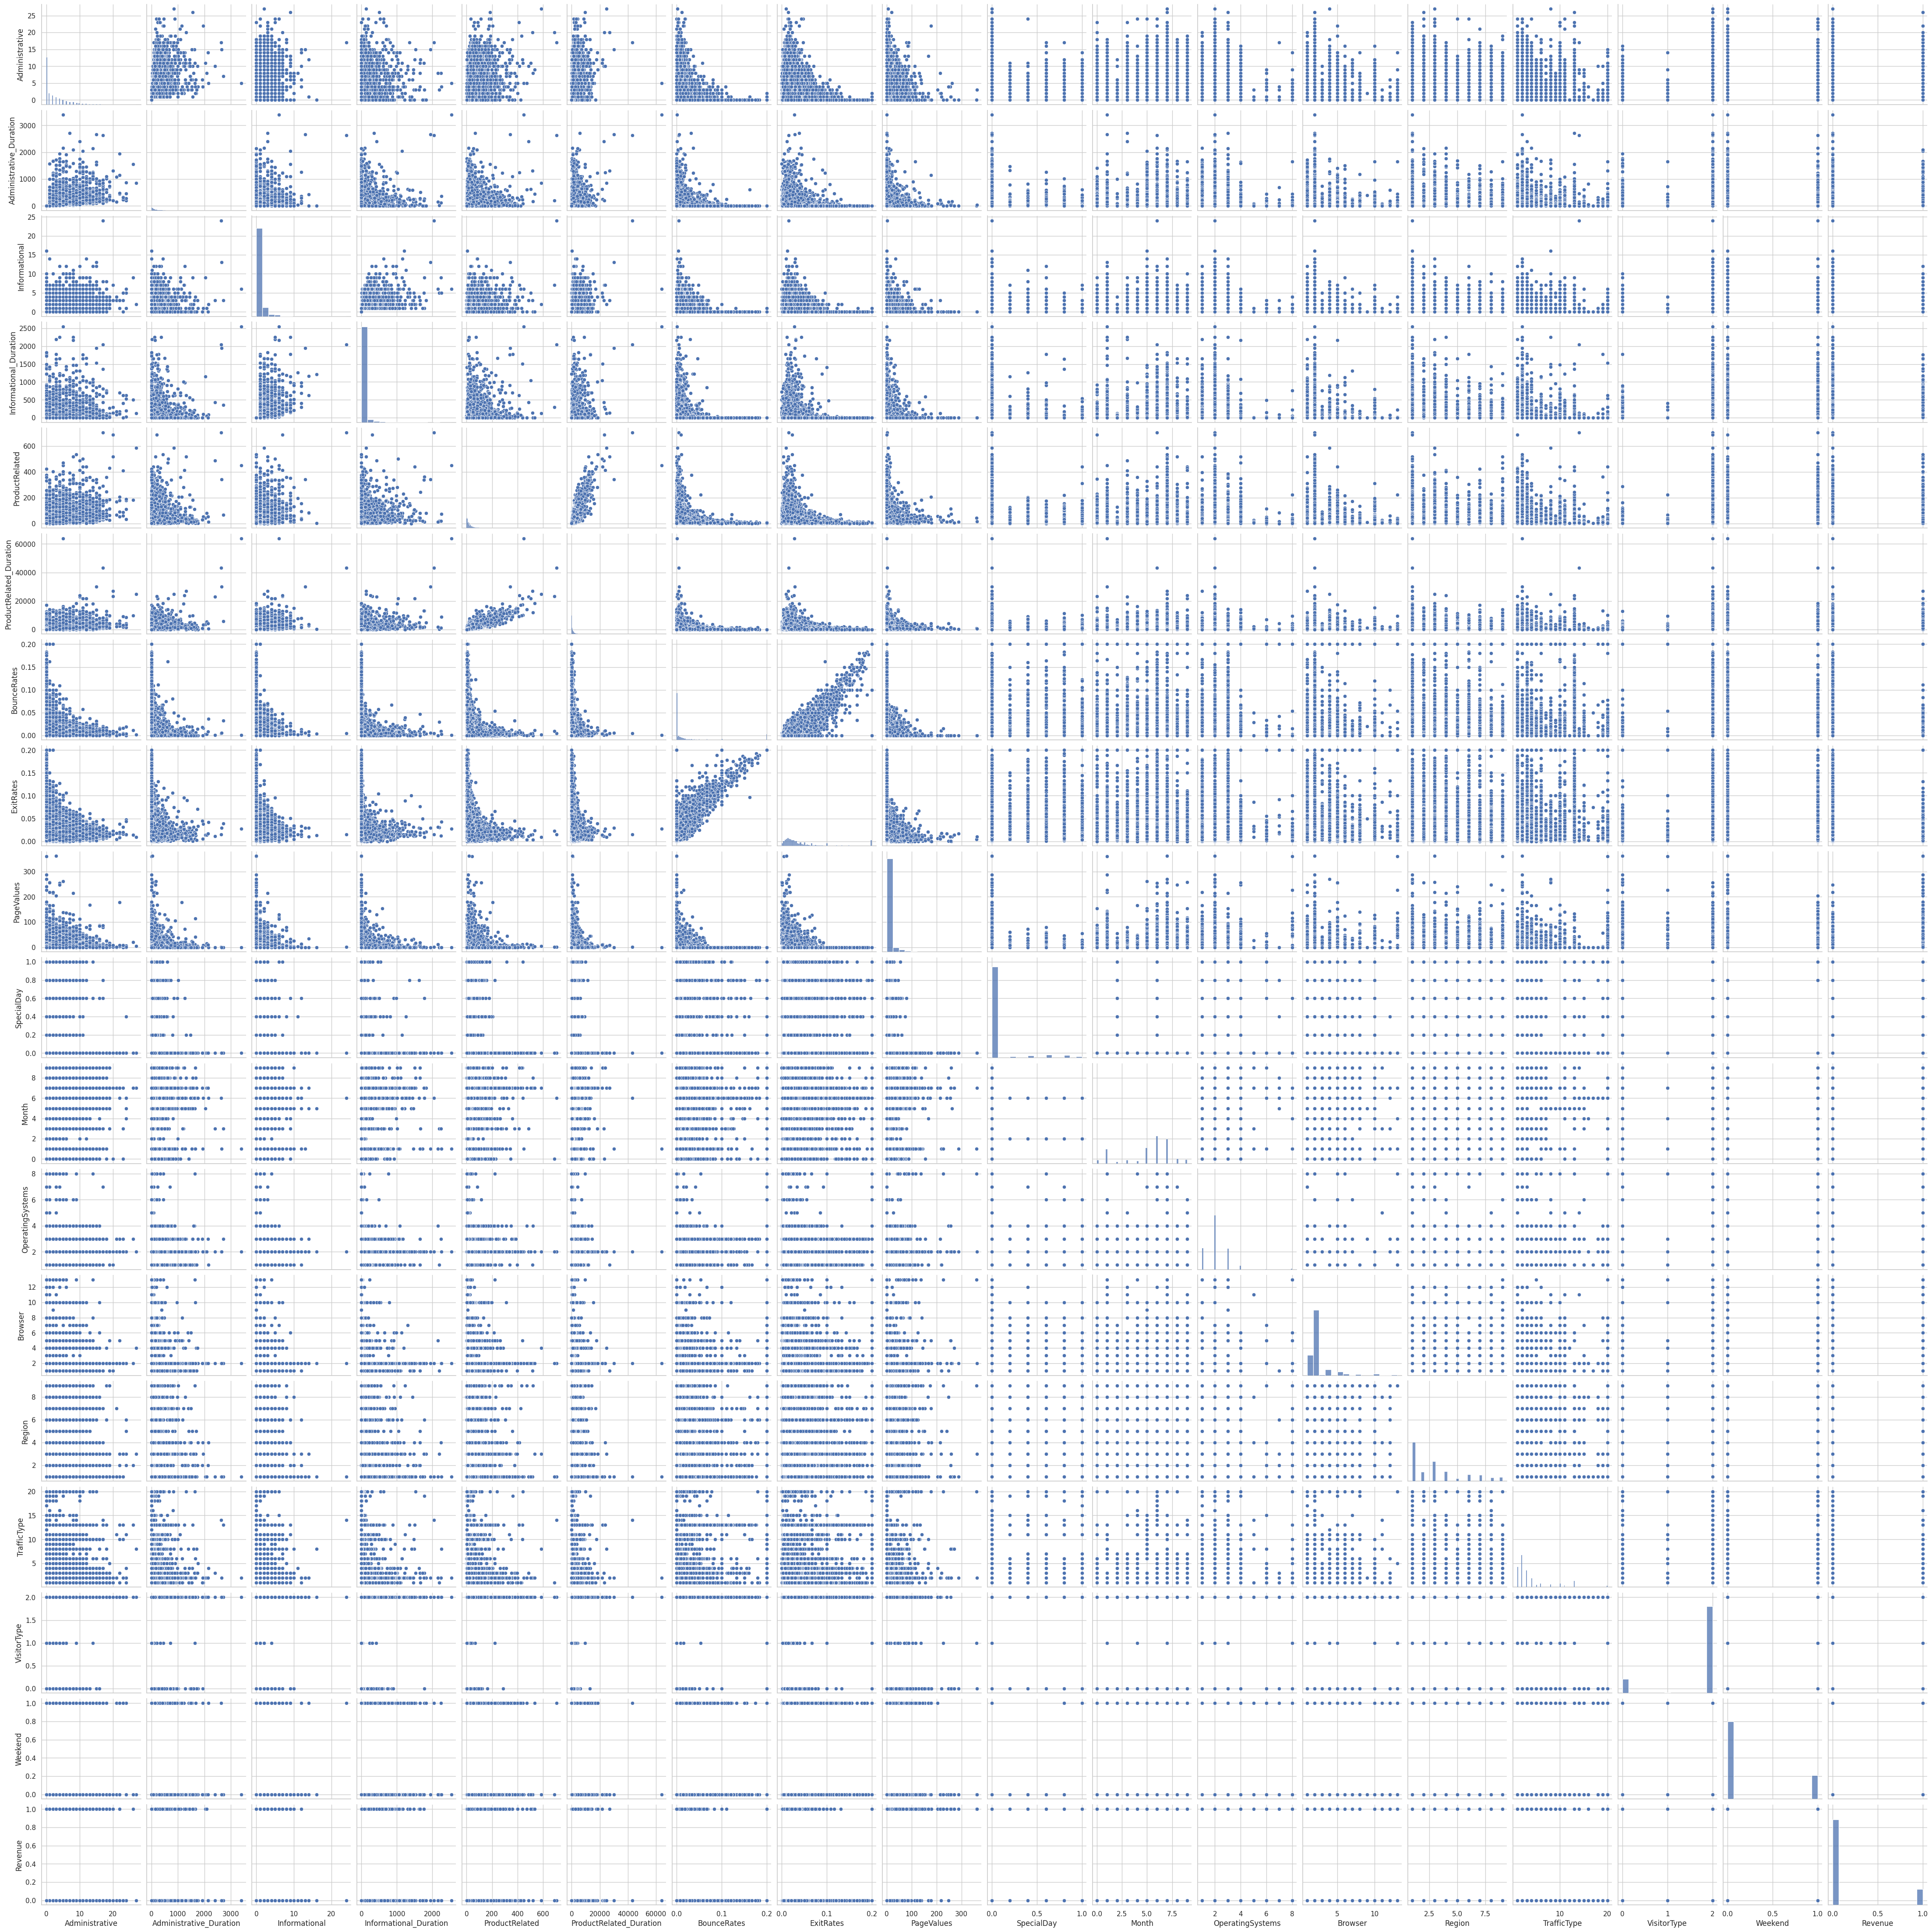

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Histograms for numerical data
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical data
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Count plots for categorical data
for column in data.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=data)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Pair plot for all numeric variables to understand pairwise relationships
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()


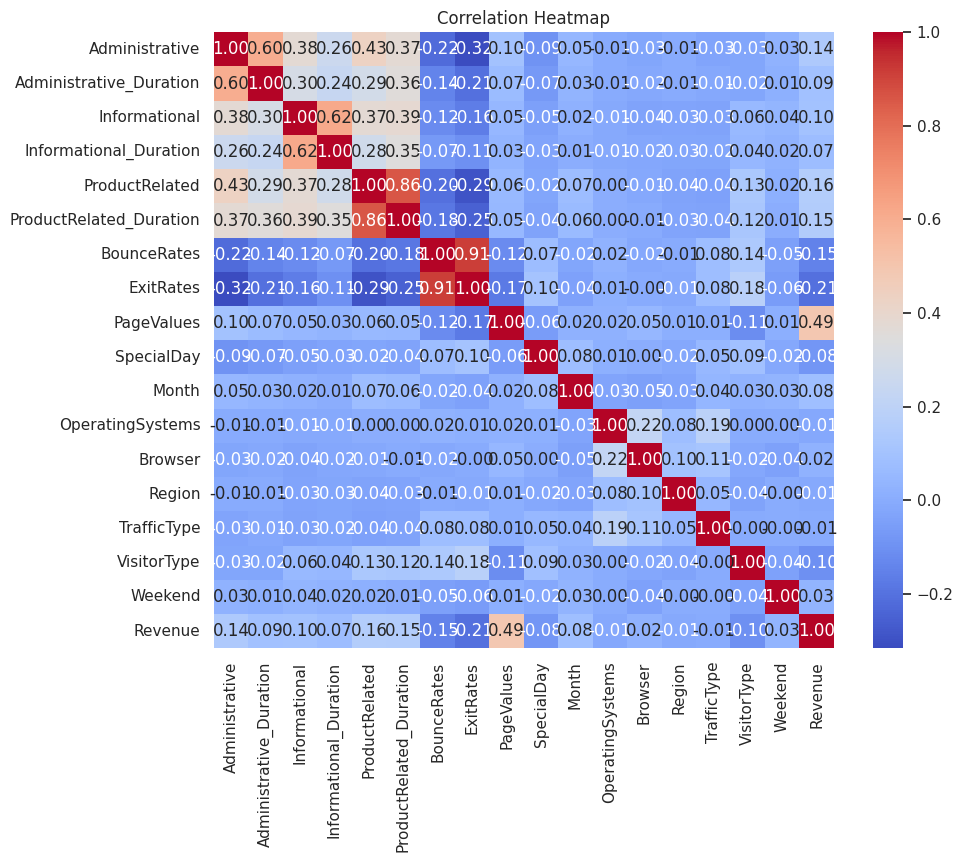

In [ ]:
# Correlation heatmap for numerical features
corr = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Example of a bar plot for categorical data
# This requires a numerical column to aggregate; replace 'num_column' with your column name
for column in data.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 4))
    data.groupby(column)['Revenue'].mean().plot(kind='bar')
    plt.title(f'Mean of num_column by {column}')
    plt.xlabel(column)
    plt.ylabel('Average of num_column')
    plt.xticks(rotation=45)
    plt.show()


In [26]:
data.head()


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0        0  
1        2       1            2            2        0        0  
2        1       9            3            2        0        0  
3        2       2            4            2        0        0  
4        3       1            4            2        1        0

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
min_max_scaler = MinMaxScaler()

# Select the first 9 columns for normalization
first_nine_columns = data.columns[:9]

# Apply the scaler to the first 9 columns
data[first_nine_columns] = min_max_scaler.fit_transform(data[first_nine_columns])

data.head(10)

Administrative  Administrative_Duration  Informational  \
0        0.000000                      0.0            0.0   
1        0.000000                      0.0            0.0   
2        0.000000                      0.0            0.0   
3        0.000000                      0.0            0.0   
4        0.000000                      0.0            0.0   
5        0.000000                      0.0            0.0   
6        0.000000                      0.0            0.0   
7        0.037037                      0.0            0.0   
8        0.000000                      0.0            0.0   
9        0.000000                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0        0.001418                 0.000000   
1                     0.0        0.002837                 0.001000   
2                     0.0        0.001418                 0.000000   
3                     0.0        0.002837                 0.000042   
4                     0.0        0.014184                 0.009809   
5                     0.0        0.026950                 0.002411   
6                     0.0        0.001418                 0.000000   
7                     0.0        0.000000                 0.000000   
8                     0.0        0.002837                 0.000578   
9                     0.0        0.004255                 0.011536   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     1.000000   1.000000         0.0         0.0      2                 1   
1     0.000000   0.500000         0.0         0.0      2                 2   
2     1.000000   1.000000         0.0         0.0      2                 4   
3     0.250000   0.700000         0.0         0.0      2                 3   
4     0.100000   0.250000         0.0         0.0      2                 3   
5     0.078947   0.122807         0.0         0.0      2                 2   
6     1.000000   1.000000         0.0         0.4      2                 2   
7     1.000000   1.000000         0.0         0.0      2                 1   
8     0.000000   0.500000         0.0         0.8      2                 2   
9     0.000000   0.111111         0.0         0.4      2                 2   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0        0  
1        2       1            2            2        0        0  
2        1       9            3            2        0        0  
3        2       2            4            2        0        0  
4        3       1            4            2        1        0  
5        2       1            3            2        0        0  
6        4       3            3            2        0        0  
7        2       1            5            2        1        0  
8        2       2            3            2        0        0  
9        4       1            2            2        0        0

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the scaler with the desired range
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

# Select the first 9 columns for normalization
first_nine_columns = data.columns[:9]

# Apply the scaler to the first 9 columns
data[first_nine_columns] = min_max_scaler.fit_transform(data.loc[:, first_nine_columns])

data.head(10)

Administrative  Administrative_Duration  Informational  \
0       -1.000000                     -1.0           -1.0   
1       -1.000000                     -1.0           -1.0   
2       -1.000000                     -1.0           -1.0   
3       -1.000000                     -1.0           -1.0   
4       -1.000000                     -1.0           -1.0   
5       -1.000000                     -1.0           -1.0   
6       -1.000000                     -1.0           -1.0   
7       -0.925926                     -1.0           -1.0   
8       -1.000000                     -1.0           -1.0   
9       -1.000000                     -1.0           -1.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    -1.0       -0.997163                -1.000000   
1                    -1.0       -0.994326                -0.997999   
2                    -1.0       -0.997163                -1.000000   
3                    -1.0       -0.994326                -0.999917   
4                    -1.0       -0.971631                -0.980383   
5                    -1.0       -0.946099                -0.995179   
6                    -1.0       -0.997163                -1.000000   
7                    -1.0       -1.000000                -1.000000   
8                    -1.0       -0.994326                -0.998843   
9                    -1.0       -0.991489                -0.976928   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     1.000000   1.000000        -1.0         0.0      2                 1   
1    -1.000000   0.000000        -1.0         0.0      2                 2   
2     1.000000   1.000000        -1.0         0.0      2                 4   
3    -0.500000   0.400000        -1.0         0.0      2                 3   
4    -0.800000  -0.500000        -1.0         0.0      2                 3   
5    -0.842105  -0.754386        -1.0         0.0      2                 2   
6     1.000000   1.000000        -1.0         0.4      2                 2   
7     1.000000   1.000000        -1.0         0.0      2                 1   
8    -1.000000   0.000000        -1.0         0.8      2                 2   
9    -1.000000  -0.777778        -1.0         0.4      2                 2   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0        0  
1        2       1            2            2        0        0  
2        1       9            3            2        0        0  
3        2       2            4            2        0        0  
4        3       1            4            2        1        0  
5        2       1            3            2        0        0  
6        4       3            3            2        0        0  
7        2       1            5            2        1        0  
8        2       2            3            2        0        0  
9        4       1            2            2        0        0

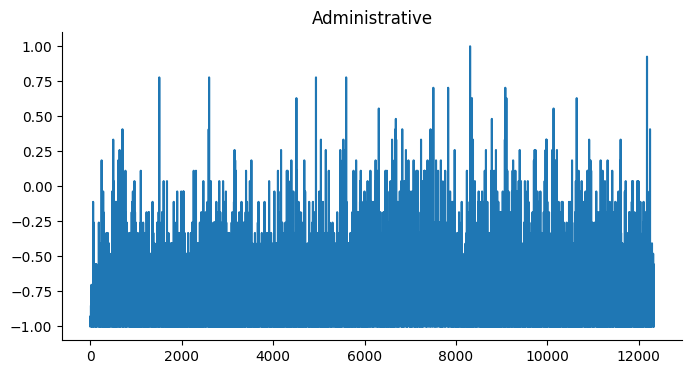

In [12]:
# @title Administrative

from matplotlib import pyplot as plt
data['Administrative'].plot(kind='line', figsize=(8, 4), title='Administrative')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Classifier
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2055
           1       0.77      0.25      0.38       411

    accuracy                           0.86      2466
   macro avg       0.82      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466

[[2024   31]
 [ 307  104]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming data is loaded into X_train, X_test, y_train, y_test

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# SVM Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions with SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Classifier:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


SVM Classifier:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2055
           1       0.00      0.00      0.00       411

    accuracy                           0.83      2466
   macro avg       0.42      0.50      0.45      2466
weighted avg       0.69      0.83      0.76      2466

[[2055    0]
 [ 411    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466

[[1986   69]
 [ 187  224]]


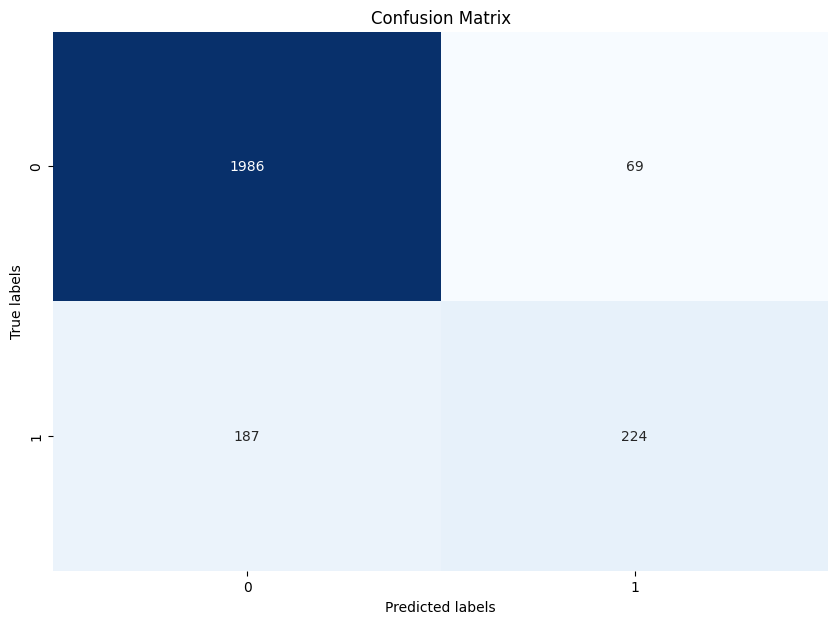

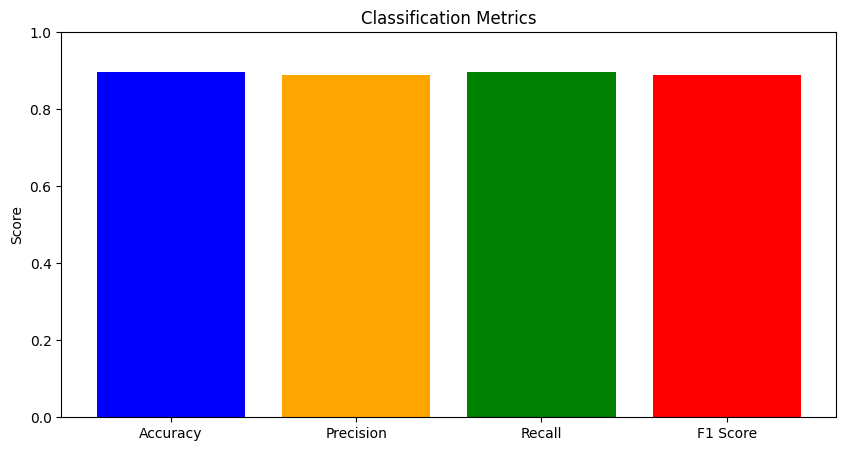

In [8]:


# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plotting classification metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.show()

In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=15)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Retrain the classifier on the balanced dataset
model.fit(X_train_smote, y_train_smote)

# Make predictions with the new model
y_pred_smote = model.predict(X_test)

# Evaluate the model after applying SMOTE
print("Random Forest Classifier with SMOTE:")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))


Random Forest Classifier with SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2055
           1       0.62      0.73      0.67       411

    accuracy                           0.88      2466
   macro avg       0.78      0.82      0.80      2466
weighted avg       0.89      0.88      0.88      2466

[[1873  182]
 [ 111  300]]


In [14]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.

In [ ]:
from pycaret.classification import *

# Setup the environment
# 'target' is the name of the target column
clf1 = setup(data, target='target', session_id=123, silent=True, use_gpu=True)
